# Lista de Exercícios de Estatística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Considere uma amostra contendo a seguinte sequência de números:

In [2]:
data = pd.Series([181.37984274, 154.80600659, 182.33424888, 170.32065307, 179.82634437,
 168.73723578, 164.28520413, 171.93415101, 171.71090179, 177.69136458,
 153.38183565, 151.13269527, 166.4994225,  828.37581774 ,168.02278222,
 169.29065423, 138.46062748, 174.88588464, 155.01472584, 164.27356639])

#Retirando outliers
clean_data = data[data < 800]

## 1) Qual a média da amostra?

In [3]:
mean = clean_data.mean()
print("Média = {}".format(mean))

Média = 166.52569195578948


## 2) Qual o desvio padrão da amostra?

In [4]:
std = clean_data.std()
print("Desvio padrão = {}".format(std))

Desvio padrão = 11.558172990787764


## 3) Faça um histograma com os dados.

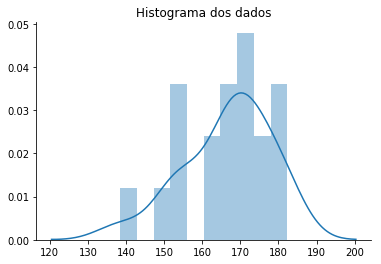

In [5]:
sns.distplot(clean_data, bins=10)

sns.despine()
plt.title('Histograma dos dados')
plt.savefig('../plots/hist-aula02.png')

## 4) Qual distribuição se enquadra melhor para os dados?

Distribuição Normal.

## 5) Infira a média da população a partir da amostra.

In [6]:
mean_pop = mean
print('Média populacional = {}'.format(mean_pop))

Média populacional = 166.52569195578948


## 6) Infira o desvio padrão da população a partir da amostra.

In [7]:
std_pop = std/(len(clean_data))**0.5
print('Desvio padrão populacional = {}'.format(std_pop))

Desvio padrão populacional = 2.65162673888448


## 7) Considerando a média e desvio padrão que você inferiu a partir da amostra e a distribuição que você hipotetizou sobre os dados,  qual a probabilidade de:

In [8]:
normal = scipy.stats.norm(mean_pop, std_pop)

 - Encontrar o valor 200.00  

0, pois estamos lidando com uma V.A. contínua.

 - O valor ser maior que 180 

In [9]:
p_180 = normal.cdf(180)
print('Probabilidade = {}'.format(1 - p_180))

Probabilidade = 1.8720818351081192e-07


 - O valor ser menor que 120 e maior que 190

In [10]:
#Assumindo que era para ser OU, invés de E
p_120 = normal.cdf(120)
p_190 = normal.cdf(190)
print('Probabilidade = {}'.format((1 - p_190) + p_120))

Probabilidade = 3.185701025789076e-69


## 8) Utilizando um grid search (um for dentro de outro igual ao utilizado na aula prática), encontre o conjunto de parâmetros da sua distribuição que maximiza o log-likelihood para os dados. Por exemplo, se você no item 4 supôs que esses dados seguem uma distribuição exponencial, você terá que achar o melhor lambda (taxa) que faz a distribuição exponencial se encaixar nos seus dados (qual lambda aumenta o likelihood).

In [11]:
best_mean = -np.inf
best_std  = -np.inf
max_likelihood = -np.inf

In [12]:
def gauss(dt, mean, std):
    g = (1/(std*np.sqrt(2*np.pi)))*np.e**(-0.5*(dt-mean)**2/std**2)
    return g

In [13]:
mean_range = np.arange(130, 200, 0.1)
std_range  = np.arange(2, 20, 0.1)

for m in mean_range:
    for s in std_range:
        fit_data = gauss(clean_data, m, s)
        likelihood = np.sum(np.log(fit_data))
        
        if likelihood > max_likelihood:
            max_likelihood = likelihood
            best_mean = m
            best_std  = s
            
print('Parâmetros:\nMédia = {} e Desvio padrão = {}'.format(best_mean, best_std))

Parâmetros:
Média = 166.49999999999793 e Desvio padrão = 11.300000000000008


## 9) A média e desvio padrão para a distribuição com os parâmetros encontrados no item 8 são próximos da média e desvio padrão da amostra? Se não, qual seria o motivo?

Sim. Porém, pode acontecer o contrário quando a distribuição suposta não é muito adequada aos dados.

## 10) Nos últimos 4 anos a empresa D&B teve um faturamento mensal médio de 50 milhões com um desvio padrão de 5 milhões.  Após a contratação de uma empresa especializada em marketing digital, os últimos seis meses apresentaram os faturamentos de 61 milhões, 54 milhões, 78 milhões, 42 milhões, 78 milhões e 73 milhões. Considerando esses seis meses como uma amostra, calcule a probabilidade dessa empresa ter melhorado o resultado do faturamento por puro acaso (dica: considerando o teorema central do limite, qual a probabilidade da média amostral  ocorrer por puro acaso, uma vez que ora ou outra resultados maiores ou menores podem ocorrer)